In [ ]:
# importing necessary libaries
import os
import time
import random
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from shutil import copyfile
from random import randrange
from sklearn.metrics import mean_squared_error

In [ ]:
#implementing functions for init, predicting rating and calculating RMSE
class latentfactormodel:
  #initialize the matrices P and Q with random initialization
  def __init__(self, num_items, num_users, num_factors, init_scale=5.0):

    self.num_factors = num_factors
    #creating instances for the class latentfactor
    self.Q = np.random.rand(num_factors, num_items+1)*np.sqrt(init_scale/num_factors)
    self.P = np.random.rand(num_factors, num_users+1)*np.sqrt(init_scale/num_factors)
    #to predict the rating
  def error(self, ratings):
    # compute the RMSE
    ratings_true = []
    ratings_predicted = []
    for user_id, item_id, rating_true in ratings:
      rating_predicted = self.predict(user_id, item_id)
      ratings_true.append(rating_true)
      ratings_predicted.append(rating_predicted)
    rmse = self.RMSE(ratings_true, ratings_predicted)
    return rmse
  #predicting rating based on user_id and item_id
  def predict(self, user_id, item_id):
    r = np.sum(self.Q[:,item_id] * self.P[:,user_id])
    return r
  #calculating the cost function
  def cost(self, ratings, lambda_):
    ratings_true = []
    ratings_predicted = []
    for user_id, item_id, rating_true in ratings:
      rating_predicted = self.predict(user_id, item_id)
      ratings_true.append(rating_true)
      ratings_predicted.append(rating_predicted)
    cost = 0
    cost += np.sum((np.array(ratings_true) - np.array(rating_predicted))**2)
    cost += lambda_*np.sum(self.P**2)
    cost += lambda_*np.sum(self.Q**2)
    return cost
   # calculating the RMSE between actual and predicted rating
  def RMSE(self, y_actual, y_predicted):
    rms = np.sqrt(mean_squared_error(y_actual, y_predicted))
    return round(rms,4)
  # Stochastic gradient descent
  def step(self,user_id, item_id, rating_true, mu, lambda_):
    error_ui = (rating_true - self.predict(user_id,item_id))
    self.P[:,user_id] += mu*(error_ui*self.Q[:,item_id] - lambda_*self.P[:,user_id])
    self.Q[:,item_id] += mu*(error_ui*self.P[:,user_id] - lambda_*self.Q[:,item_id])




In [ ]:
def step(self,user_id, item_id, rating_true, mu, lambda_):
    # perform one iteration of SGD for one example in the train dataset
    error_ui = (rating_true - self.predict(user_id,item_id))
    self.P[:,user_id] += mu*(error_ui*self.Q[:,item_id] - lambda_*self.P[:,user_id])
    self.Q[:,item_id] += mu*(error_ui*self.P[:,user_id] - lambda_*self.Q[:,item_id])

In [ ]:
training_data = 'training_dataset.csv'
testing_data = 'test_dataset.csv'


In [ ]:
#reading data as a dataframe
train_data = pd.read_csv(training_data)
train_data.head(7)

,user_id,item_id,rating,movie_name
0,527,200,3,"Shining, The (1980)"
1,407,25,3,"Birdcage, The (1996)"
2,533,462,2,Like Water For Chocolate (Como agua para choco...
3,537,1048,2,She's the One (1996)
4,374,932,1,First Kid (1996)
5,498,262,2,In the Company of Men (1997)
6,592,196,5,Dead Poets Society (1989)


In [ ]:
#reading data as a dataframe
test_data = pd.read_csv(testing_data)
test_data.head(7)

,user_id,item_id,rating,movie_name
0,181,258,3,Contact (1997)
1,320,588,3,Beauty and the Beast (1991)
2,560,121,3,Independence Day (ID4) (1996)
3,200,812,4,Andre (1994)
4,614,294,4,Liar Liar (1997)
5,825,1011,3,2 Days in the Valley (1996)
6,707,12,3,"Usual Suspects, The (1995)"


In [ ]:
#removing movie name column from the datasets
# import train and since we do not need name of the movie column we just exclude it while reading it into the train and test data
train_data = pd.read_csv(training_data,usecols=[0, 1, 2])
# import train and since we do not need name of the movie column we just exclude it while reading it into the train and test data
test_data = pd.read_csv(testing_data,usecols=[0, 1, 2])
train_data.head()




,user_id,item_id,rating
0,527,200,3
1,407,25,3
2,533,462,2
3,537,1048,2
4,374,932,1


In [ ]:
test_data.head()

,user_id,item_id,rating
0,181,258,3
1,320,588,3
2,560,121,3
3,200,812,4
4,614,294,4


In [ ]:
#finding the number of users by maximum function in test and train data
num_users = max(train_data.user_id.max(), test_data.user_id.max())
num_items = max(train_data.item_id.max(), test_data.item_id.max())
#average rating of all the users in train data
global_mean = train_data.rating.mean()
train_data, test_data = train_data.values, test_data.values
train_data.shape

(90000, 3)

In [ ]:
test_data.shape

(10000, 3)

In [ ]:

# define parameters of the latent factor model
#iterations is num_epochs
num_epochs = 40
mu = 0.01
lambda_ = 0.1

num_factors = 25

# store rmse, cost at each iteration
rmse_cost_plot = np.zeros((num_epochs,5))

# latent factor model
lf = latentfactormodel(num_items + 1, num_users + 1, num_factors)

print("{:<15} {:<15} {:<15} ".format('Iteration', 'Train RMSE', 'Test TMSE'))
epochs = 0

rmse_cost_plot[epochs,0] = epochs
rmse_cost_plot[epochs,1], rmse_cost_plot[epochs,2] = lf.error(train_data), lf.error(test_data)
rmse_cost_plot[epochs,3], rmse_cost_plot[epochs,4] = lf.cost(train_data,lambda_), lf.cost(test_data, lambda_)

start = time.time()
# performing Stochastic Gradient Descent for fixed number of epochs
for epochs in range(num_epochs):
  for ran in np.random.permutation(train_data.shape[0]):
    # performing SGD for the train data set
    lf.step(*train_data[ran], mu, lambda_,)

  # rmse and costs are assigned to variables
  rmse_cost_plot[epochs,0] = epochs
  rmse_cost_plot[epochs,1], rmse_cost_plot[epochs,2]  =  lf.error(train_data), lf.error(test_data)
  rmse_cost_plot[epochs,3], rmse_cost_plot[epochs,4] = lf.cost(train_data,lambda_), lf.cost(test_data, lambda_)

  print("{:<15} {:<15} {:<15} ".format(epochs, lf.error(train_data), lf.error(test_data)))

print('Total CPU time = ', time.time() - start)

Iteration       Train RMSE      Test TMSE       
0               0.9827          0.9989          
1               0.9428          0.9704          
2               0.9311          0.9609          
3               0.9232          0.9563          
4               0.9213          0.9553          
5               0.9189          0.9551          
6               0.9154          0.9545          
7               0.913           0.9522          
8               0.9057          0.9471          
9               0.9033          0.9459          
10              0.898           0.9451          
11              0.8935          0.9425          
12              0.8866          0.9366          
13              0.8835          0.9377          
14              0.8747          0.9308          
15              0.871           0.9284          
16              0.864           0.9266          
17              0.8596          0.9241          
18              0.8535          0.9235          
19              0.84

Plotting RMSE and Error

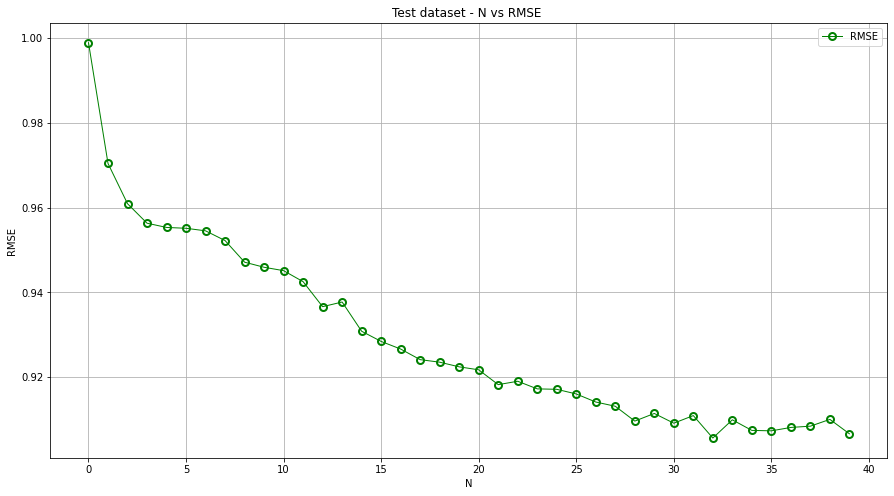

In [ ]:
# RMSE vs N where N(0-40)
fig, ax = plt.subplots(1,1,figsize=(15,8))

ax.plot(rmse_cost_plot[:,0], rmse_cost_plot[:,2],'go-', lw=1, ms=7, mew=2, fillstyle='none', label='RMSE')

ax.grid()
ax.set_xlabel('N')
ax.set_ylabel('RMSE')
ax.set_title('Test dataset - N vs RMSE ')
ax.legend(loc='upper right')

plt.show()

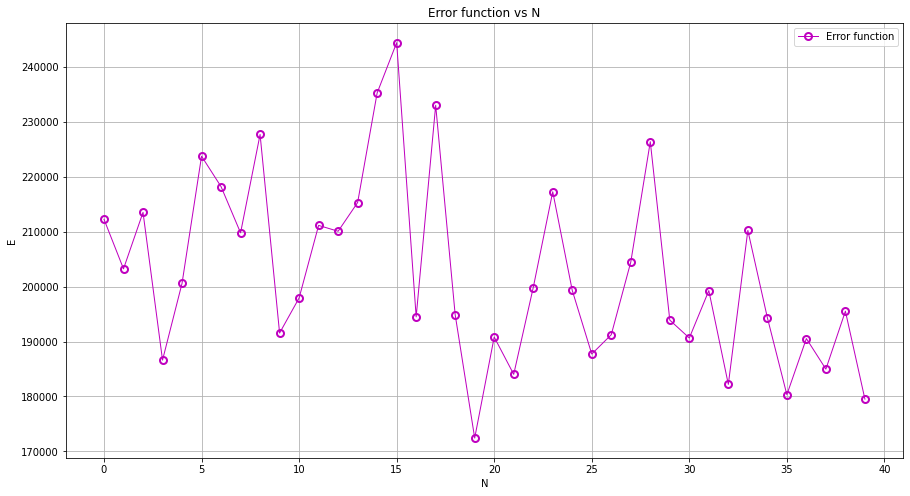

In [ ]:
#plotting the error function and N(0-40)
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.plot(rmse_cost_plot[:,0], rmse_cost_plot[:,3], 'mo-', lw=1, ms=7, mew=2, fillstyle='none',  label='Error function')

ax.grid()
ax.set_xlabel('N')
ax.set_ylabel('E')
ax.set_title('Error function vs N')
ax.legend(loc='upper right')


TUNING HYPERPARAMETERS


In [ ]:
#tuning parameters mu and number of iterations
num_epochs = 50
mu = 0.001
lambda_ = 0.1

num_factors = 25
# store rmse, cost at each iteration
rmse_cost_plot = np.zeros((num_epochs,5))

# latent factor model
lf = latentfactormodel(num_items + 1, num_users + 1, num_factors)

print("{:<15} {:<15} {:<15} ".format('Iteration', 'Train RMSE', 'Test TMSE'))
epochs = 0

rmse_cost_plot[epochs,0] = epochs
rmse_cost_plot[epochs,1], rmse_cost_plot[epochs,2] = lf.error(train_data), lf.error(test_data)
rmse_cost_plot[epochs,3], rmse_cost_plot[epochs,4] = lf.cost(train_data,lambda_), lf.cost(test_data, lambda_)

start = time.time()
# performing Stochastic Gradient Descent for fixed number of epochs
for epochs in range(num_epochs):
  for ran in np.random.permutation(train_data.shape[0]):
    # performing SGD for the train data set
    lf.step(*train_data[ran], mu, lambda_,)

  # rmse and costs are assigned to variables
  rmse_cost_plot[epochs,0] = epochs
  rmse_cost_plot[epochs,1], rmse_cost_plot[epochs,2]  =  lf.error(train_data), lf.error(test_data)
  rmse_cost_plot[epochs,3], rmse_cost_plot[epochs,4] = lf.cost(train_data,lambda_), lf.cost(test_data, lambda_)

  print("{:<15} {:<15} {:<15} ".format(epochs, lf.error(train_data), lf.error(test_data)))

Iteration       Train RMSE      Test TMSE       
0               1.7711          1.7809          
1               1.3655          1.3771          
2               1.2039          1.2157          
3               1.1235          1.1358          
4               1.075           1.0883          
5               1.0425          1.0571          
6               1.0193          1.0351          
7               1.0023          1.0194          
8               0.989           1.007           
9               0.9784          0.9976          
10              0.9699          0.9898          
11              0.9631          0.9839          
12              0.9573          0.9789          
13              0.9525          0.9748          
14              0.9483          0.9714          
15              0.9449          0.9685          
16              0.9417          0.9659          
17              0.939           0.9636          
18              0.9367          0.9619          
19              0.93

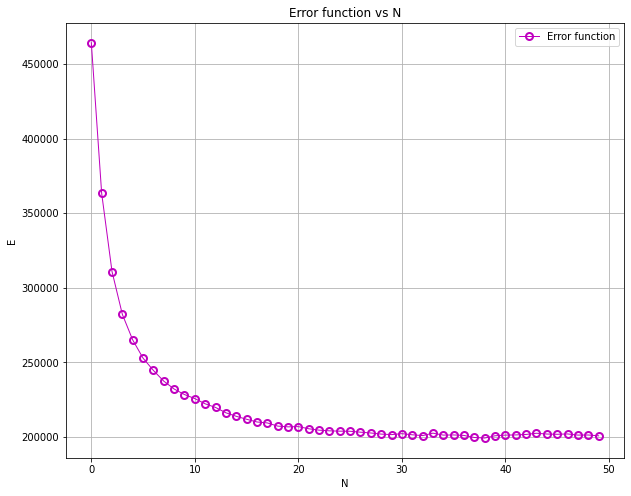

In [ ]:
#plotting the error function and N(0-40)
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(rmse_cost_plot[:,0], rmse_cost_plot[:,3], 'mo-', lw=1, ms=7, mew=2, fillstyle='none',  label='Error function')

ax.grid()
ax.set_xlabel('N')
ax.set_ylabel('E')
ax.set_title('Error function vs N')
ax.legend(loc='upper right')